# Map log: Examine individual players' activity
Natalia Vélez, November 2020

In [62]:
%matplotlib inline

import os, re, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as opj

import matplotlib.path as mpath
from matplotlib import animation, rc
from IPython.display import HTML

sys.path.insert(1, '../3_technology/')
import ohol_objects as obj

sns.set_style('white')
sns.set_context('talk')

## Load data

Select files:

In [63]:
data_dir = '../../data/publicMapChangeData/bigserver2.onehouronelife.com/'
examples = [3057210, 3057286] # avatars hand-picked for this visualization
tstamps = [1591479985, 1591566385] # outputs of grep -lr [avatar] [maplog_dir]
data_files = [opj(data_dir, '%itime_mapLog.txt' % t) for t in tstamps]
print(*data_files, sep='\n')

../../data/publicMapChangeData/bigserver2.onehouronelife.com/1591479985time_mapLog.txt
../../data/publicMapChangeData/bigserver2.onehouronelife.com/1591566385time_mapLog.txt


Helper functions:

In [64]:
def str_extract(pattern, s): return re.search(pattern,s).group(0)

def start_t(f):

    with open(f) as f_handle:
        header = f_handle.readline().strip()

    t_string = str_extract('[0-9.]+', header)
    t = float(t_string)
    
    return t

Load data:

In [65]:
data_list = []
maplog_cols = ['time', 'x', 'y', 'item', 'avatar']

for f in data_files:
    tmp_d = pd.read_table(f, skiprows=1, names=maplog_cols, sep=' ')
    tmp_start = start_t(f)
    tmp_d['time'] = tmp_d['time'] + tmp_start
    data_list.append(tmp_d)
    
map_data = pd.concat(data_list)
map_data = map_data.sort_values(by = 'time').reset_index(drop=True)
print(map_data.shape)
map_data.head()

(2737272, 5)


,time,x,y,item,avatar
0,1.591480e+09,-25975,-122,3161,3054242
1,1.591480e+09,-27513,-161,396,3054270
2,1.591480e+09,-26113,-128,3810,3054262
3,1.591480e+09,-47929,-478,236,3054243
4,1.591480e+09,-47913,-530,292,3054260


Lifelog data:

In [66]:
life_data = pd.read_csv('../2_demographics/outputs/all_lifelogs_compact.tsv', sep='\t', index_col=0)
life_data.head()

/users/nvelezalicea/.conda/envs/py3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,player,avatar,tBirth,parent,birth,tDeath,death,age,cause_of_death,birthX,birthY,deathX,deathY,first,last
0,06d8ab86b0daf11b13a446b87f770aa20bee1ca0,3308603,1599462917,3308581,[-63752 -504],NaN,[],NaN,NaN,-63752,-504,NaN,NaN,SUPERIOR,MATSU
1,67bffa53500e2c626edc407409b6550996b748db,3308602,1599462864,3308575,[-63753 -507],NaN,[],NaN,NaN,-63753,-507,NaN,NaN,FEATHER,MATSU
2,fbc0168048713cfaf6ef6a350c0171e7b2b0af4a,3308601,1599462805,3308564,[-63762 -523],NaN,[],NaN,NaN,-63762,-523,NaN,NaN,SASHA,MATSU
3,5d5050247e485d0224df4e392118c27b8ee3a88b,3308598,1599462667,3308575,[-63747 -498],NaN,[],NaN,NaN,-63747,-498,NaN,NaN,DRAGON,MATSU
4,310d12780dbb316a3b50f83adbf9ce76973172bb,3308597,1599462620,3308571,[-63756 -508],1.599464e+09,[-63841 -520],28.89,hunger,-63756,-508,-63841.0,-520.0,MODOU,MATSU


## How sparse is the map?

In [113]:
map_coords

,x,y,item
0,-91119,-20221,1
1,-71619,-20097,1
2,-71616,-20098,1
3,-71561,-20096,1
4,-71522,-20097,1
...,...,...,...
118218,5400282,9351,3
118219,5400284,6590,1
118220,5400285,9241,1
118221,5400286,9242,1


<AxesSubplot:xlabel='x', ylabel='y'>

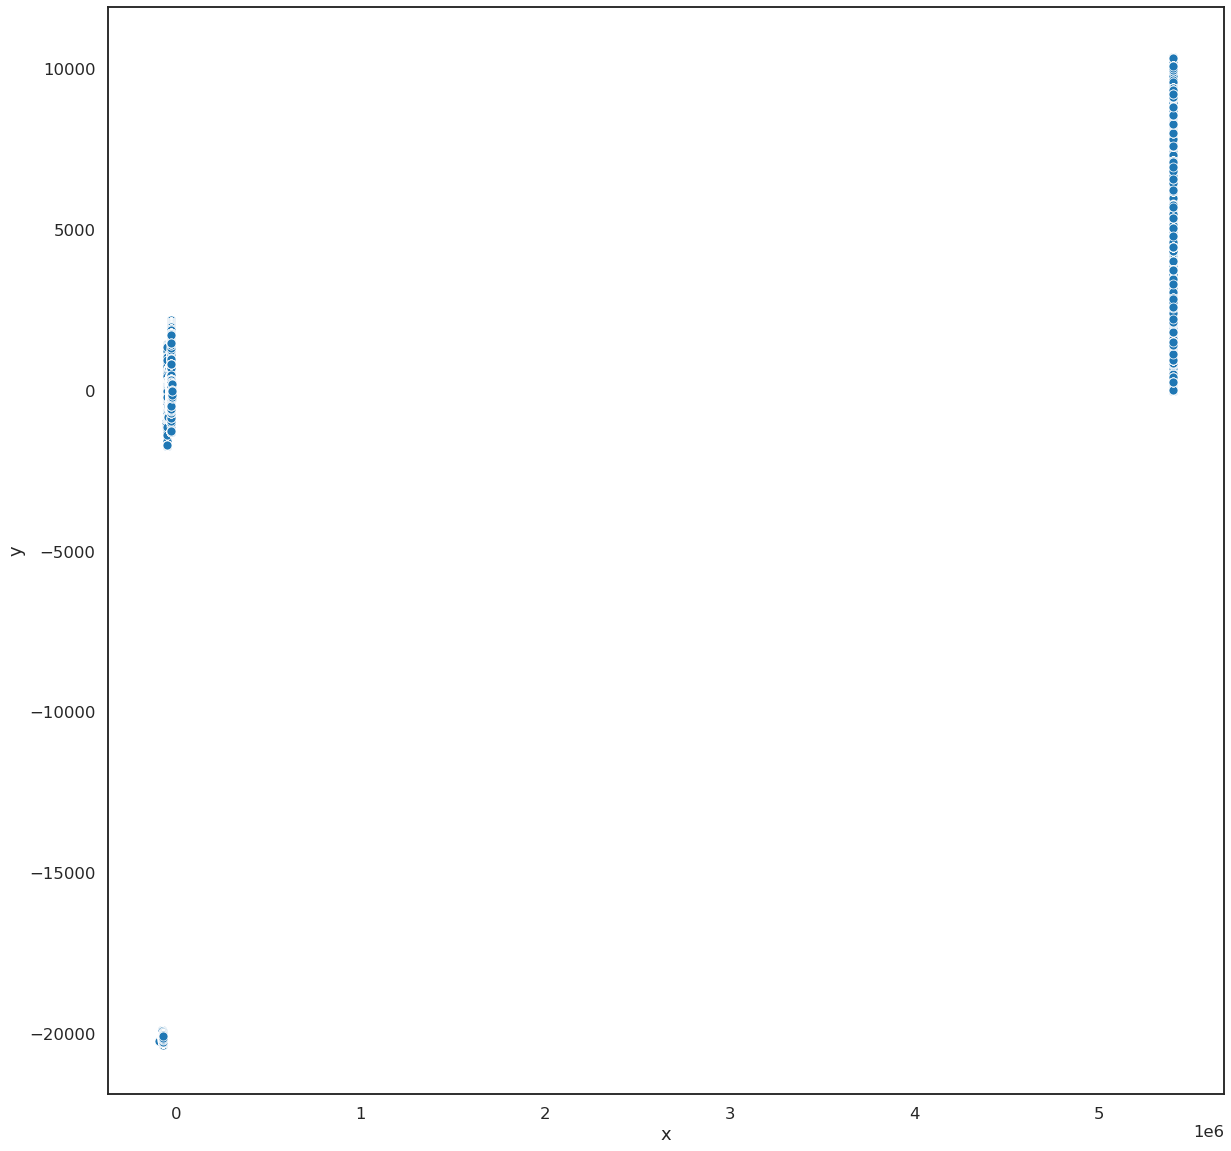

In [115]:
f, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(data=map_coords,x='x',y='y')

<AxesSubplot:xlabel='y'>

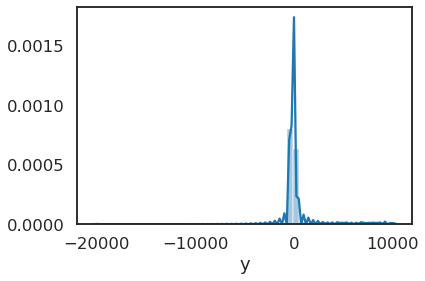

In [111]:
sns.distplot(map_coords['y'])

In [105]:
total_spots

168877423989

In [103]:
n_occupied/total_spots

7.000521277947761e-07

In [107]:
map_coords = map_data[map_data['avatar'] > 0]
map_coords = map_coords[['x','y','item']]
map_coords = map_coords.groupby(['x','y'])['item'].count().reset_index()
n_occupied = map_coords.shape[0]

map_extent = map_coords.agg({'x': ['min', 'max'], 'y': ['min', 'max']})
#map_extent = map_extent.loc['max'] - map_extent.loc['min'] + 1
#total_spots = map_extent['x'] * map_extent['y']

# map_coords = map_coords[['x','y']].to_records(index=False)
# map_coords = np.array(map_coords.tolist())
# plt.plot(*map_coords, 'o')

## Case study

Filter data

In [67]:
example_map = map_data[map_data['avatar'] == examples[0]].reset_index(drop=True)
print(example_map.shape)
example_map.head()

(1107, 5)


,time,x,y,item,avatar
0,1.591564e+09,-48595,277,391u5,3057210
1,1.591564e+09,-48601,275,0,3057210
2,1.591564e+09,-48600,269,258,3057210
3,1.591564e+09,-48598,268,227,3057210
4,1.591564e+09,-48604,266,0,3057210


Where was this player born? 

In [61]:
def str_to_coords(c_str):
    c = [int(s) for s in re.findall('[-0-9]+', c_str)]
    return c

example_life = life_data[life_data['avatar'] == examples[0]]
extra_cols = [-1, examples[0]]

# Place and time of avatar's birth
birth_t = example_life['tBirth'].iloc[0]
birth_coords = str_to_coords(example_life['birth'].iloc[0])
birth = [birth_t] + birth_coords + extra_cols
birth_df = pd.DataFrame([birth], columns=maplog_cols)

# Place and time of avatar's death
death_t = example_life['tDeath'].iloc[0]
death_coords = str_to_coords(example_life['death'].iloc[0])
death = [death_t] + death_coords + extra_cols
death_df = pd.DataFrame([death], columns=maplog_cols)

# Merge
example_data = pd.concat([birth_df, example_map, death_df])
example_data = example_data.reset_index(drop=True)
example_data['time'] = (example_data['time'] - birth_t)/60

print(example_data.shape)
example_data.head()

(1109, 5)


,time,x,y,item,avatar
0,0.000000,-48597,277,-1,3057210
1,3.499500,-48595,277,391u5,3057210
2,3.582667,-48601,275,0,3057210
3,3.760667,-48600,269,258,3057210
4,3.781667,-48598,268,227,3057210


How big of an area did this avatar cover?

In [8]:
extent = example_data[['x', 'y']].agg(['max', 'min'])
x_range = np.arange(extent['x']['min'], extent['x']['max']+1)
y_range = np.arange(extent['y']['min'], extent['y']['max']+1)

# Habitat size
width = len(x_range)
height = len(y_range)

print('Case study worked within a %i x %i area' % (width, height))
extent

Case study worked within a 33 x 43 area


,x,y
max,-48579,294
min,-48611,252


Where did this avatar spend its time?

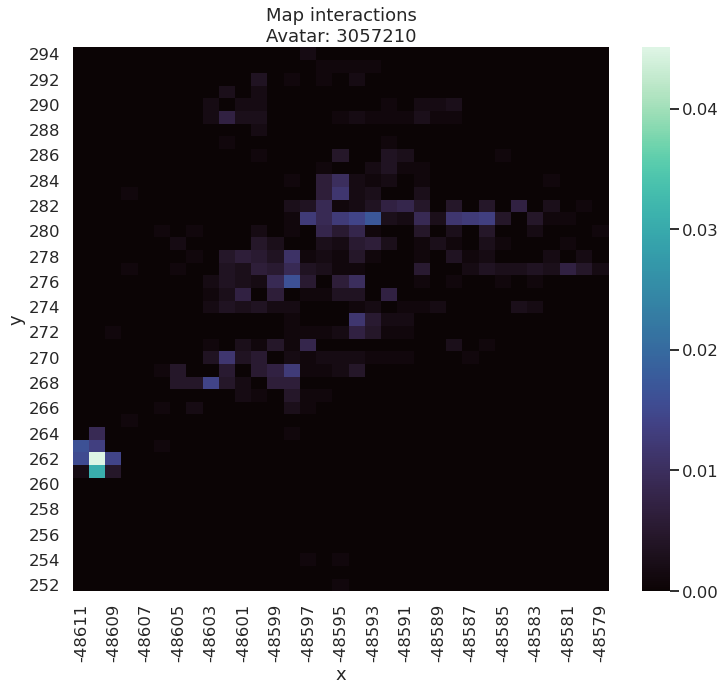

In [9]:
# Count 
coord_counts = example_data.groupby(['x','y'])['item'].agg('count').reset_index()
coord_counts = coord_counts.rename(columns={'item': 'visits'})

# Heatmap with all coordinates
grid = pd.DataFrame([(x,y) for x in x_range for y in y_range], columns=['x', 'y'])
grid = pd.merge(grid, coord_counts, how='outer')
grid['visits'] = grid['visits'].fillna(0)
grid['visits'] = grid['visits']/np.sum(grid['visits'])
grid = grid.pivot("y", "x", "visits")

fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(grid, ax=ax, cmap='mako')
ax.set(title='Map interactions\nAvatar: %i' % examples[0])
ax.invert_yaxis()

What did this avatar iteract with?

In [10]:
# Get all unique, valid item interactions
example_items = example_data.copy()
example_items['item'] = example_items['item'].str.replace(r'^(f)|([u-v][0-9]+$)', '')
example_items['item'] = pd.to_numeric(example_items['item'])
example_items = example_items.dropna()
example_items['item'] = example_items['item'].astype(np.int)
example_items = example_items[example_items['item'] > 0]

# Sort by frequency
common_items = example_items.groupby('item')['time'].agg('count').reset_index()
common_items = common_items.sort_values(by='time', ascending = False)
common_items['name'] = common_items['item'].apply(obj.obj_name)
common_items.head(25)

,item,time,name
93,1099,90,Partial Bucket of Water
71,511,55,Pond
22,235,40,Clay Bowl - empty
68,484,39,Hand Cart
137,2742,29,Carrot Pile
121,1316,28,Stack of Firewood
133,2123,28,Stack of Wrought Iron
61,400,23,Carrot Row
30,253,19,Bowl of Gooseberries - +yum31
56,391,16,Domestic Gooseberry Bush


Animated plot

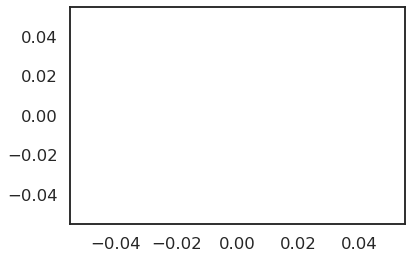

In [52]:
fig, ax = plt.subplots()
x,y=xy_coords[:10,:].T
#line1, = ax.plot(x, y, 'o', color = '#afc8de')
#line2, = ax.plot(*xy_coords[11,:], 'o', color = '#105da3')

line1, = ax.plot([], [], 'o', color = '#afc8de')
line2, = ax.plot([], [], 'o', color = '#105da3')

line1.set_data(x,y)

# plt.plot(x,y,'o',color='#0384fc')
# plt.plot(x,y,'o',color='#0384fc')

,time,x,y,item,avatar
0,0.000000,-48597,277,-1,3057210
1,3.499500,-48595,277,391u5,3057210
2,3.582667,-48601,275,0,3057210
3,3.760667,-48600,269,258,3057210
4,3.781667,-48598,268,227,3057210
...,...,...,...,...,...
1104,59.007667,-48586,277,593,3057210
1105,59.022167,-48585,277,0,3057210
1106,59.031500,-48585,277,484,3057210
1107,60.011833,-48594,292,87,3057210


(1109, 2)


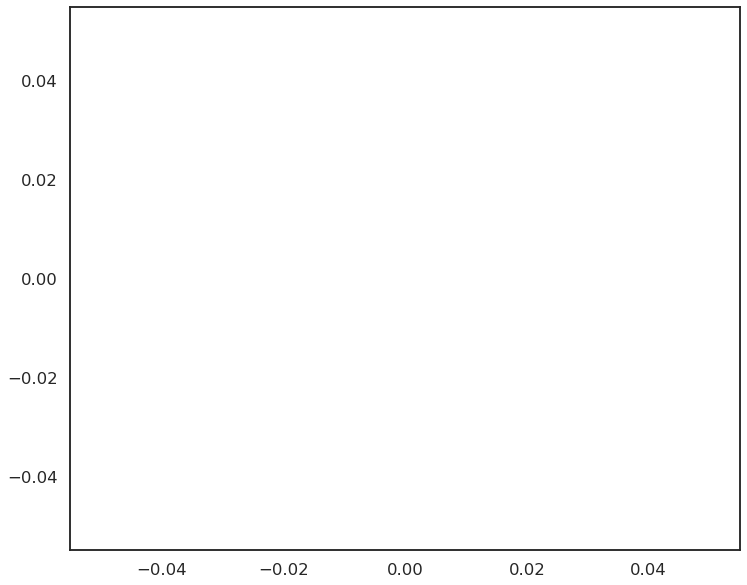

In [16]:
xy_coords = example_data[['x','y']].to_records(index=False)
xy_coords = np.array(xy_coords.tolist())
n_coords = xy_coords.shape[0]
print(xy_coords.shape)

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(*xy_coords[1,:],'o')
ax.set(xlim=(extent['x']['min'], extent['x']['max']),ylim=(extent['y']['min'], extent['y']['max']))

# animation function. This is called sequentially
def animate(i):
    
    path = mpath.Path(xy_coords[:i,:])
    x, y = zip(*path.vertices)
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=range(1,n_coords), interval=20, blit=True)

HTML(anim.to_html5_video())

1109

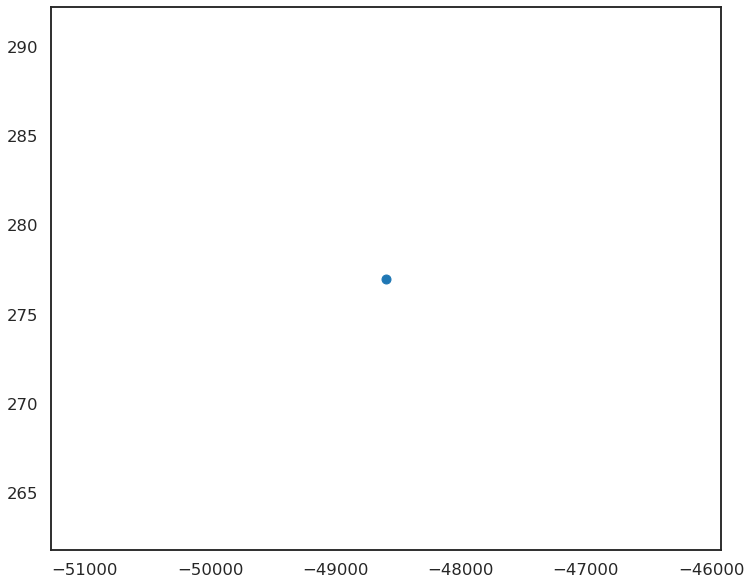